## Exploratory Data Analysis

To start, importing the necessary libraries using the following codes:

In [291]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import cv2
import os

## Class balance analysis

The below code counts the number of images for each class in the 'datathon 2022 dataset' directory, using the os.listdir() function to list the files in each subdirectory.

The counts are stored in a Pandas dataframe, with one row for each class and columns for the class name and the number of images in that class.

The dataframe can be used to analyze the distribution of the different classes in the dataset, which can be useful for understanding the balance of the dataset and determining if any classes are significantly over- or underrepresented.

In [2]:
directory = 'datathon 2022 dataset'

# get number of images for each class
num_acne = len(os.listdir(directory + '/Acne'))
num_cyst = len(os.listdir(directory + '/Cyst, tumour and skin-tags'))
num_melanoma = len(os.listdir(directory + '/Melanoma'))
num_normal = len(os.listdir(directory + '/Normal skin'))
num_moneypox = len(os.listdir(directory + '/Moneypox'))

# create a dataframe to store the data
df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'],
                   'num_images': [num_acne, num_cyst, num_melanoma, num_normal, num_moneypox]})

In [3]:
print("total number of images: ", (num_acne + num_cyst+num_melanoma+num_normal+num_moneypox))

total number of images:  3000


The code above calculates the total number of images in the dataset by adding up the number of images in each class. The total number of images in the dataset is 3000.

In [4]:
# toatl number of images for each class
print('acne:', num_acne, ' cyst:', num_cyst, ' melanoma:', num_melanoma, ' normal:', num_normal, ' moneypox:', num_moneypox)

acne: 400  cyst: 600  melanoma: 600  normal: 700  moneypox: 700


It appears that the dataset contains a total of <b>400 acne images, 600 cyst images, 600 melanoma images, 700 normal skin images, and 700 monkeypox </b> images.

Now lets visually inspect the number of images for each class to get a better understanding of the unbalanceness.

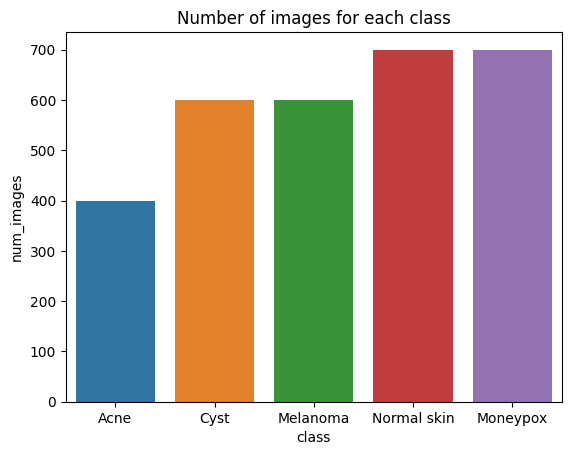

In [6]:
# seaborn barplot
sns.barplot(x='class', y='num_images', data=df)
plt.title('Number of images for each class')
plt.show()

Based on the image count for each class, it appears that the <b>'datathon 2022 dataset' is relatively not balanced </b>. Except the Acne class which has the fewest images, all of other classes have roughly the same number of images, with only a 100-image difference between the class with the most images (normal skin).

## Resolution accross classes

Now let's see the average images sizes for each classes.

In [69]:
# scatter plot width and height for each class with tensorflow
import tensorflow as tf
import numpy as np

# get the image width and height for each class
def get_image_size(directory):
    width = []
    height = []
    for filename in os.listdir(directory):
        img = tf.io.read_file(directory + '/' + filename)
        img = tf.image.decode_jpeg(img, channels=3)
        width.append(img.shape[0])
        height.append(img.shape[1])
    return width, height


# get the image width and height for each class
acne_width, acne_height = get_image_size(directory + '/Acne')
cyst_width, cyst_height = get_image_size(
    directory + '/Cyst, tumour and skin-tags')
melanoma_width, melanoma_height = get_image_size(directory + '/Melanoma')
normal_width, normal_height = get_image_size(directory + '/Normal skin')
moneypox_width, moneypox_height = get_image_size(directory + '/Moneypox')

# create a dataframe to store the data

df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'],
                   'width': [np.mean(acne_width), np.mean(cyst_width), np.mean(melanoma_width), np.mean(normal_width), np.mean(moneypox_width)],
                   'height': [np.mean(acne_height), np.mean(cyst_height), np.mean(melanoma_height), np.mean(normal_height), np.mean(moneypox_height)]})

print(df)

         class       width       height
0         Acne  222.000000   294.000000
1         Cyst  225.565000   299.576667
2     Melanoma  931.735000  1234.233333
3  Normal skin  474.391429   591.082857
4     Moneypox  383.442857   448.391429


Based on the mean width and height values for each class, it appears that the <b>size and resolution of the images vary significantly across the different classes</b>. For example, the acne images are much smaller (222x294 pixels) than the melanoma images (931x1234 pixels).

Size and resolution of the images may affect the performance of the model. For example, a model trained on high-resolution images may not generalize well to low-resolution images, and vice versa. As a result, it may be necessary to adjust the model or the pre-processing steps accordingly in order to achieve good performance on the task.

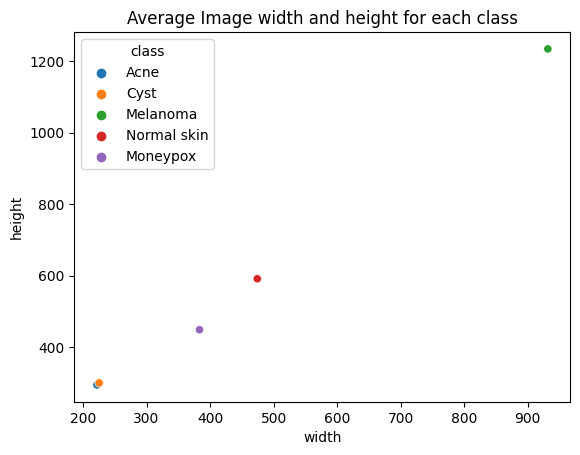

In [70]:
# seaborn scatterplot
sns.scatterplot(x='width', y='height', hue='class', data=df)
plt.title('Average Image width and height for each class')
plt.show()

More Visualization for image with and heights

In [8]:
df_acne = pd.DataFrame({'width': acne_width, 'height': acne_height})
df_cyst = pd.DataFrame({'width': cyst_width, 'height': cyst_height})
df_melanoma = pd.DataFrame({'width': melanoma_width, 'height': melanoma_height})
df_normal = pd.DataFrame({'width': normal_width, 'height': normal_height})
df_moneypox = pd.DataFrame({'width': moneypox_width, 'height': moneypox_height})

<AxesSubplot: xlabel='width', ylabel='height'>

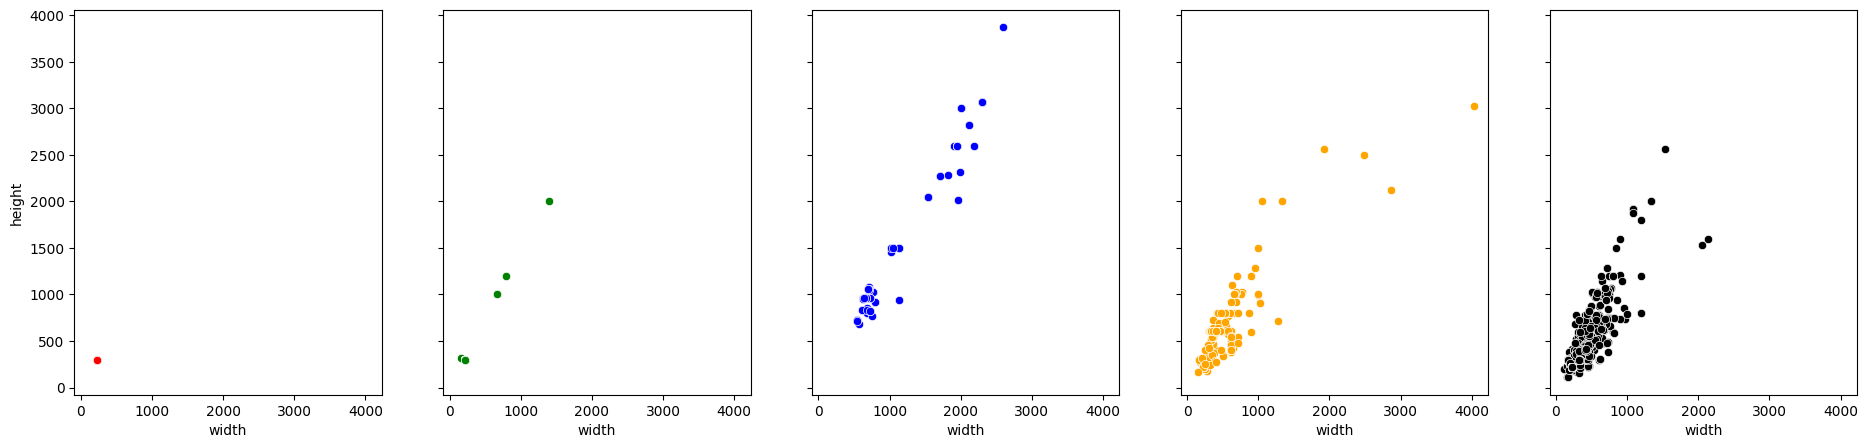

In [9]:
# seaborn subplot
fig, ax = plt.subplots(1, 5, figsize=(23, 5), sharey=True, sharex=True)

sns.scatterplot(ax=ax[0], data=df_acne, x="width", y="height", color='red')
sns.scatterplot(ax=ax[1], data=df_cyst, x="width", y="height", color='green')
sns.scatterplot(ax=ax[2], data=df_melanoma,x="width", y="height", color='blue')
sns.scatterplot(ax=ax[3], data=df_normal, x="width",y="height", color='orange')
sns.scatterplot(ax=ax[4], data=df_moneypox,x="width", y="height", color='black')

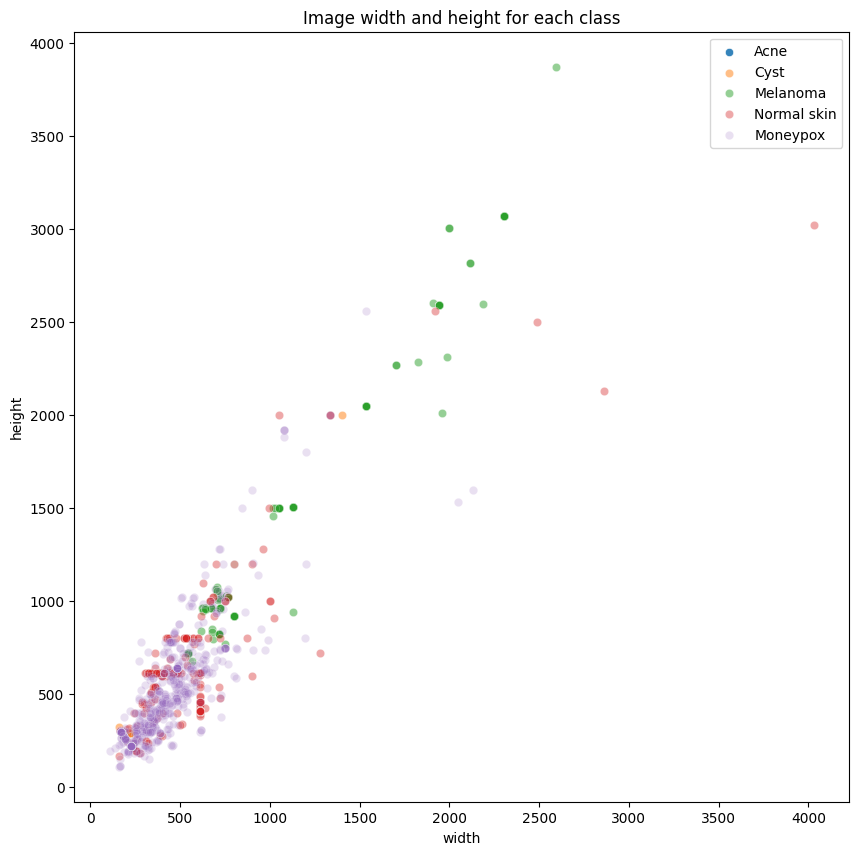

In [10]:
# seaborn scatterplot
# change plot size
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_acne, x="width", y="height", alpha=0.9,)
sns.scatterplot(data=df_cyst, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_melanoma, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_normal, x="width", y="height", alpha=0.4)
sns.scatterplot(data=df_moneypox, x="width", y="height", alpha=0.2)

plt.title('Image width and height for each class')
plt.legend(['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'])

It seams that <b>acne class has a image count and has a low image resolution than all other classes.</b>


The code below checks for any corrupted images in the 'datathon 2022 dataset' directory and its subdirectories. It does this by using the Python Pillow library to open each image and attempt to read the first pixel of the image data. If this operation fails, it indicates that the image is corrupted.

In [71]:
def verify_jpeg_image(file_path):
    try:
        img = Image.open(file_path)
        img.getdata()[0]
    except OSError:
        return True
    return False

path = 'datathon 2022 dataset'
corrupted_count = 0


for filename in os.listdir('datathon 2022 dataset'):
    listdir = os.listdir(os.path.join(path, filename))

    for img in listdir:
        impath = str(os.path.join(path, filename,img))
        corrupted_count += verify_jpeg_image(impath)

print('curruped_images:', corrupted_count)

curruped_images: 0


The code then counts the number of corrupted images and prints the result. In this case, the output is "0", which indicates that <b>there are no corrupted images</b> in the dataset.

## Image Plot

Now let's Generates a tf.data.Dataset from image files in the directory to visualize the images

In [198]:
directory = 'datathon 2022 dataset'
# ims = 256
image_size = (256, 256)
# Generates a tf.data.Dataset from image files in a directory.
df = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation='lanczos5',
    crop_to_aspect_ratio=False,
)
class_names = df.class_names

Found 2985 files belonging to 5 classes.


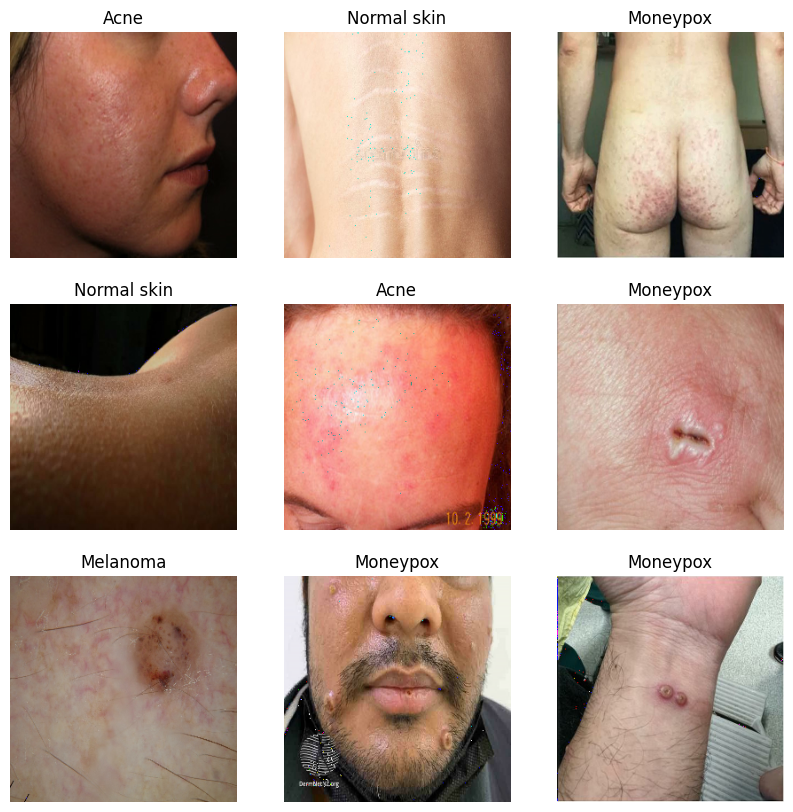

In [199]:
plt.figure(figsize=(10, 10))
for images, labels in df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Let's visualize what a blended melanoma look like

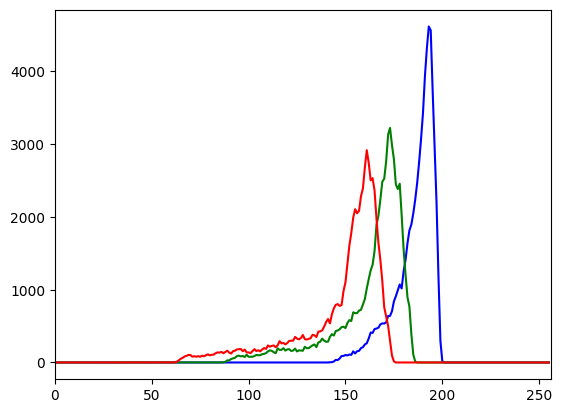

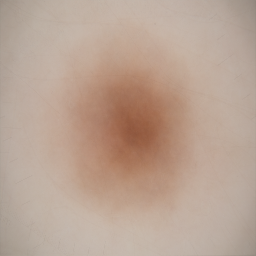

In [298]:
melanoma_test_ds = df.unbatch().filter(lambda image, label: label == 2).batch(32)

#  get a image color histogram
def get_image_histogram(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

for images, labels in melanoma_test_ds.take(1):
    first = Image.fromarray(images[0].numpy().astype("uint8"))
    a = 1
    for i in range(1, len(images)):
        img = images[i].numpy()
        first += img
        a+=1


first = first/a
blended_image = Image.fromarray(first.astype("uint8"))  
get_image_histogram(first)
blended_image


In average this is what zoomed melanoma looks like.

The histogram of the blended image can provide a lot of valuable information about the characteristics of the images in the dataset and can help you identify any potential problems or issues that may need to be addressed.

for other classes we can't get a average image as they were taken from all parts of the body